In [1]:
paciente='paciente1'

In [2]:
import codigo
from codigo import utils
from codigo import model_utils
import time

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

In [5]:
with open('dataset/generado/'+paciente+'/array_Xtrain.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [6]:
len(array_Xtrain)

1523

In [7]:
with open('dataset/generado/'+paciente+'/array_Ytrain.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [8]:
len(array_Ytrain)

1523

In [9]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

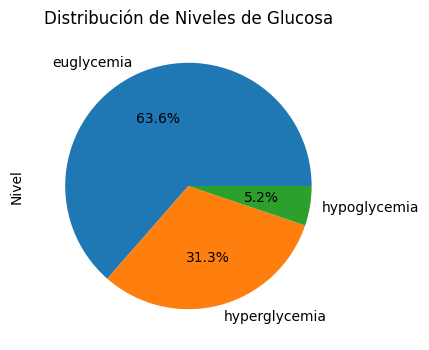

In [10]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [11]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       968
hyperglycemia    476
hypoglycemia      79
Name: Nivel, dtype: int64

In [12]:
df_Y_scaled

,Glucose level,Nivel
0,73.0,euglycemia
1,73.0,euglycemia
2,69.0,hypoglycemia
3,73.0,euglycemia
4,81.0,euglycemia
...,...,...
1518,135.0,euglycemia
1519,147.0,euglycemia
1520,123.0,euglycemia
1521,92.0,euglycemia


## Paso 1

In [13]:
N=5
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

In [14]:
print(len(XP[2]))

305


In [15]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

In [16]:
from multiprocessing.pool import ThreadPool as Pool
import time

In [17]:

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 229
Program finished in 0.024077599999145605 seconds - using multiprocessing
1 471
Program finished in 0.023126800006139092 seconds - using multiprocessing
2 686
Program finished in 0.020605199999408796 seconds - using multiprocessing
3 913
Program finished in 0.022070099992561154 seconds - using multiprocessing
4 1139
Program finished in 0.022351099993102252 seconds - using multiprocessing


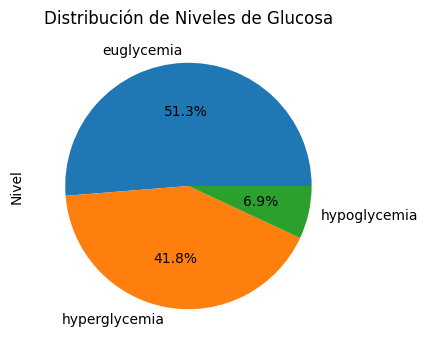

In [18]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [19]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       584
hyperglycemia    476
hypoglycemia      79
Name: Nivel, dtype: int64

<AxesSubplot: >

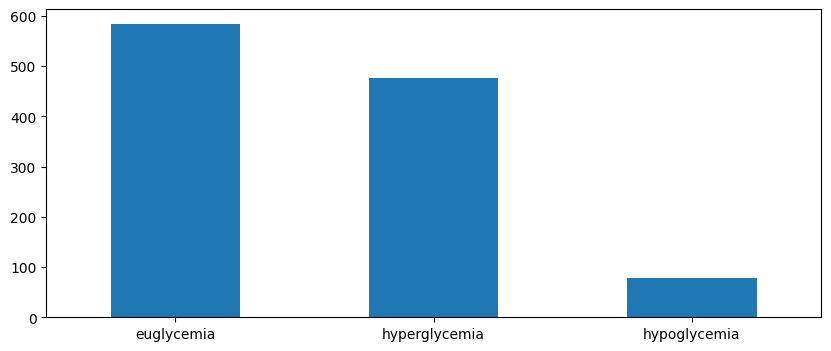

In [20]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [21]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down.npy', 'wb') as f:
    np.save(f, XNew)

In [22]:
len(XNew)

1139

In [23]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down.npy', 'wb') as f:
    np.save(f, YNew)

In [24]:
len(YNew)

1139

## Paso 2

In [25]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

228


In [26]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 181
Program finished in 0.021726199993281625 seconds - using multiprocessing
1 370
Program finished in 0.017631900002015755 seconds - using multiprocessing
2 535
Program finished in 0.020637699999497272 seconds - using multiprocessing
3 720
Program finished in 0.016254199988907203 seconds - using multiprocessing
4 901
Program finished in 0.014629099998273887 seconds - using multiprocessing


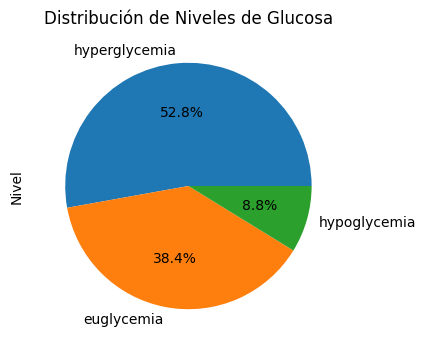

In [27]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [28]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    476
euglycemia       346
hypoglycemia      79
Name: Nivel, dtype: int64

In [29]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

180


In [30]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 143
Program finished in 0.02272209999500774 seconds - using multiprocessing
1 282
Program finished in 0.01536360000318382 seconds - using multiprocessing
2 433
Program finished in 0.011326400010148063 seconds - using multiprocessing
3 575
Program finished in 0.013166800010367297 seconds - using multiprocessing
4 712
Program finished in 0.012783199999830686 seconds - using multiprocessing


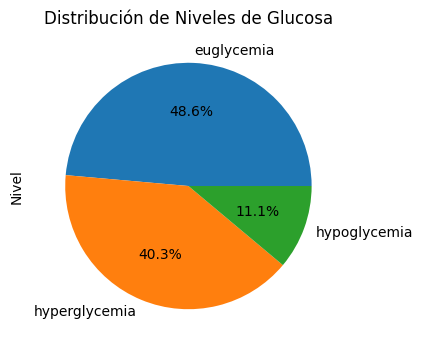

In [31]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [32]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       346
hyperglycemia    287
hypoglycemia      79
Name: Nivel, dtype: int64

In [33]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down2.npy', 'wb') as f:
    np.save(f, XNew)

In [34]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down2.npy', 'wb') as f:
    np.save(f, YNew)

## Paso 3

In [35]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

142
0 116
Program finished in 0.019802299997536466 seconds - using multiprocessing
1 240
Program finished in 0.010827999998582527 seconds - using multiprocessing
2 343
Program finished in 0.01609479999751784 seconds - using multiprocessing
3 462
Program finished in 0.012182199992821552 seconds - using multiprocessing
4 580
Program finished in 0.012193000002298504 seconds - using multiprocessing


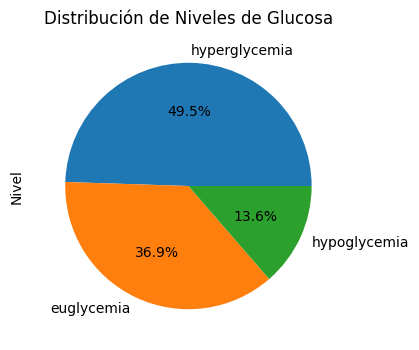

In [36]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [37]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    287
euglycemia       214
hypoglycemia      79
Name: Nivel, dtype: int64

In [38]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

116
0 96
Program finished in 0.013168499994208105 seconds - using multiprocessing
1 190
Program finished in 0.011576700009754859 seconds - using multiprocessing
2 287
Program finished in 0.011658799994620495 seconds - using multiprocessing
3 382
Program finished in 0.011565799999516457 seconds - using multiprocessing
4 473
Program finished in 0.018722900000284426 seconds - using multiprocessing


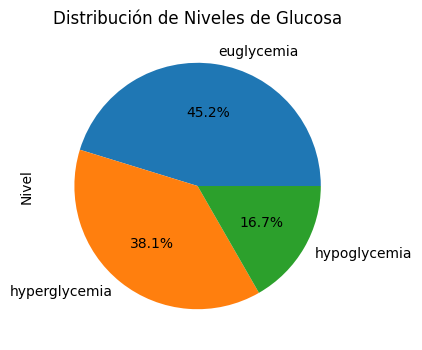

In [39]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [40]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       214
hyperglycemia    180
hypoglycemia      79
Name: Nivel, dtype: int64

In [41]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down3.npy', 'wb') as f:
    np.save(f, XNew)

In [42]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down3.npy', 'wb') as f:
    np.save(f, YNew)

## Paso 4

In [43]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

95
0 77
Program finished in 0.015510500001255423 seconds - using multiprocessing
1 160
Program finished in 0.010733700008131564 seconds - using multiprocessing
2 231
Program finished in 0.0109972999925958 seconds - using multiprocessing
3 309
Program finished in 0.01102829999581445 seconds - using multiprocessing
4 387
Program finished in 0.011547200003406033 seconds - using multiprocessing


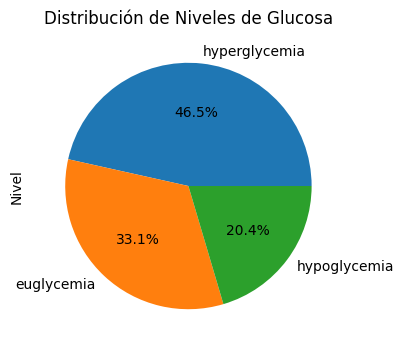

In [44]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [45]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    180
euglycemia       128
hypoglycemia      79
Name: Nivel, dtype: int64

In [46]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

77
0 64
Program finished in 0.0410078999993857 seconds - using multiprocessing
1 129
Program finished in 0.01361959999485407 seconds - using multiprocessing
2 194
Program finished in 0.011536099991644733 seconds - using multiprocessing
3 261
Program finished in 0.009409799997229129 seconds - using multiprocessing
4 320
Program finished in 0.013052099995547906 seconds - using multiprocessing


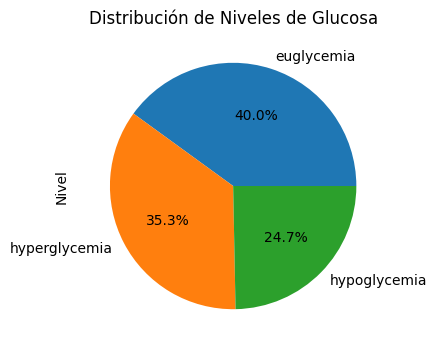

In [47]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [48]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       128
hyperglycemia    113
hypoglycemia      79
Name: Nivel, dtype: int64

In [49]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down4.npy', 'wb') as f:
    np.save(f, XNew)

In [50]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down4.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling reduciendo hasta el total de la clase minoritaria

In [51]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down4.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [52]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down4.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [53]:
len(array_Ytrain)

320

In [54]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

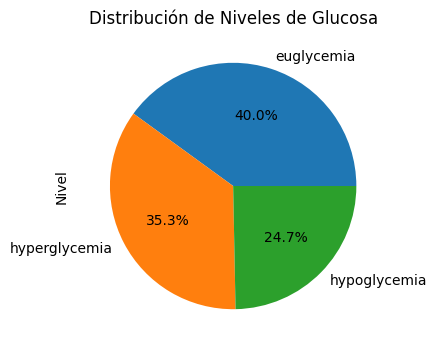

In [55]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [56]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       128
hyperglycemia    113
hypoglycemia      79
Name: Nivel, dtype: int64

In [57]:
minClass=df_Y_scaled['Nivel'].value_counts().min()

In [58]:
minClass

79

In [59]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(array_Xtrain,array_Ytrain,array_Ytrain_label,0,'hyperglycemia',False,minClass) 

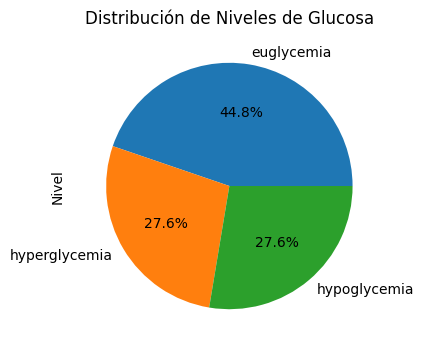

In [60]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [61]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       128
hyperglycemia     79
hypoglycemia      79
Name: Nivel, dtype: int64

In [62]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(XNew,YNew,YnewLabel,0,'euglycemia',False,minClass) 

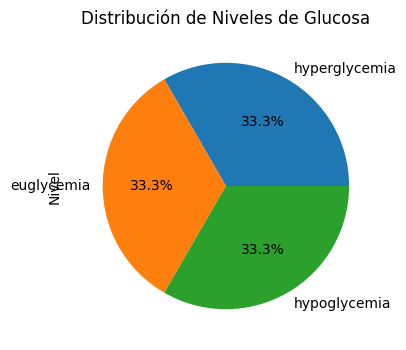

In [63]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [64]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    79
euglycemia       79
hypoglycemia     79
Name: Nivel, dtype: int64

<AxesSubplot: >

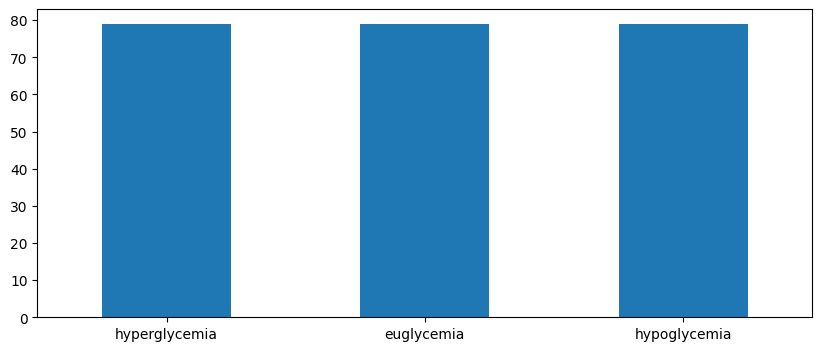

In [65]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [66]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down_equals.npy', 'wb') as f:
    np.save(f, XNew)

In [67]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down_equals.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling on validation dataset

In [68]:
with open('dataset/generado/'+paciente+'/array_Xval.npy', 'rb') as f:
    array_Xval = np.load(f)

In [69]:
len(array_Xval)

190

In [70]:
with open('dataset/generado/'+paciente+'/array_Yval.npy', 'rb') as f:
    array_Yval = np.load(f)

In [71]:
len(array_Yval)

190

In [72]:
array_Yval_scaled=scalerGlucosa.inverse_transform(array_Yval)

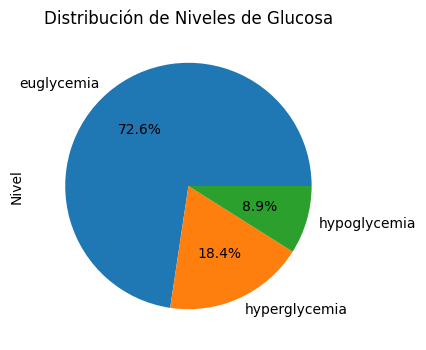

In [73]:
df_Yval_scaled = pd.DataFrame(array_Yval_scaled, columns=['Glucose level']) 
df_Yval_scaled['Nivel'] = df_Yval_scaled['Glucose level'].apply(utils.label_LevelBG)  
array_YVal_label=df_Yval_scaled['Nivel'].to_numpy()
df_Yval_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [74]:
df_Yval_scaled['Nivel'].value_counts()

euglycemia       138
hyperglycemia     35
hypoglycemia      17
Name: Nivel, dtype: int64

<AxesSubplot: >

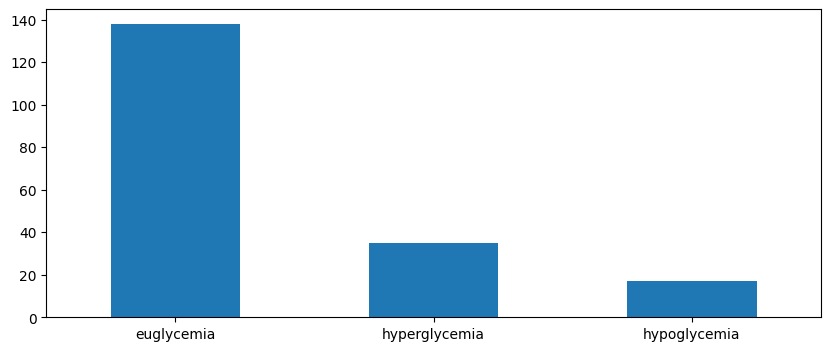

In [75]:
df_Yval_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [76]:
N=3
XP=np.array_split(array_Xval, N) 
YP=np.array_split(array_Yval, N)
Y_labelP=np.array_split( array_YVal_label, N)
print(len(XP[2]))

63


In [77]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xval.shape[1],array_Xval.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 49
Program finished in 0.02124760000151582 seconds - using multiprocessing
1 88
Program finished in 0.017201000009663403 seconds - using multiprocessing
2 134
Program finished in 0.015099199998076074 seconds - using multiprocessing


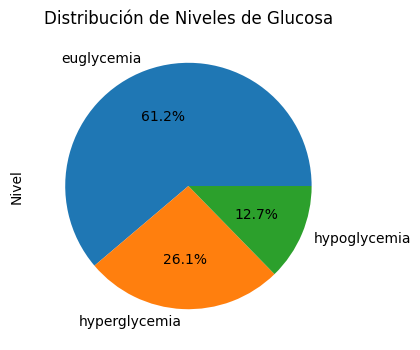

In [78]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [79]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       82
hyperglycemia    35
hypoglycemia     17
Name: Nivel, dtype: int64

In [80]:
with open('dataset/generado/'+paciente+'/array_Xval_down.npy', 'wb') as f:
    np.save(f, XNew)

In [81]:
with open('dataset/generado/'+paciente+'/array_Yval_down.npy', 'wb') as f:
    np.save(f, YNew)

In [82]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=2
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 50
Program finished in 0.01622010000573937 seconds - using multiprocessing
1 99
Program finished in 0.016812699992442504 seconds - using multiprocessing


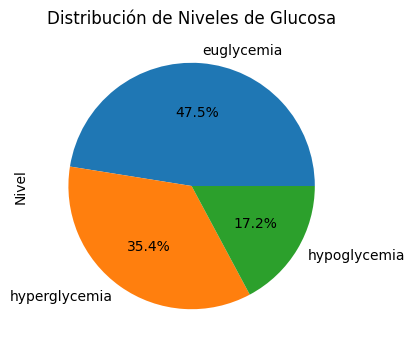

In [83]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [84]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       47
hyperglycemia    35
hypoglycemia     17
Name: Nivel, dtype: int64

In [85]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=2
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 42
Program finished in 0.012828099992475472 seconds - using multiprocessing
1 82
Program finished in 0.016027599995140918 seconds - using multiprocessing


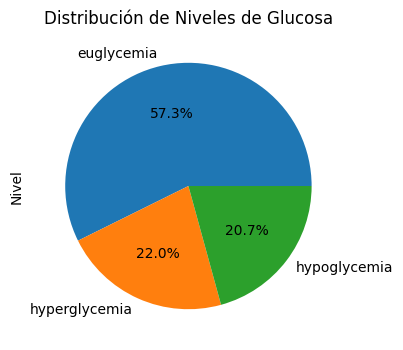

In [86]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [87]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       47
hyperglycemia    18
hypoglycemia     17
Name: Nivel, dtype: int64

In [88]:
with open('dataset/generado/'+paciente+'/array_Xval_down2.npy', 'wb') as f:
    np.save(f, XNew)

In [89]:
with open('dataset/generado/'+paciente+'/array_Yval_down2.npy', 'wb') as f:
    np.save(f, YNew)

In [90]:
len(XNew)

82

<AxesSubplot: >

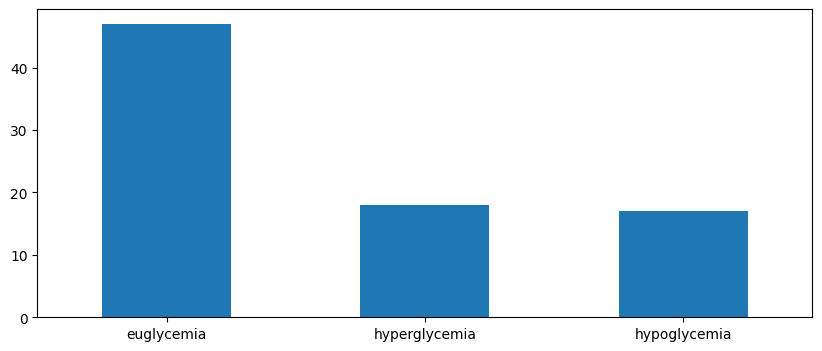

In [91]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [92]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=2
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 32
Program finished in 0.014975400001276284 seconds - using multiprocessing
1 61
Program finished in 0.016733500000555068 seconds - using multiprocessing


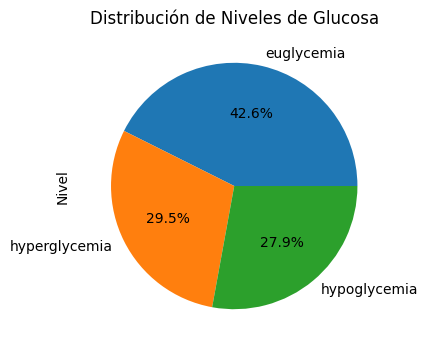

In [93]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [94]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       26
hyperglycemia    18
hypoglycemia     17
Name: Nivel, dtype: int64

In [95]:
with open('dataset/generado/'+paciente+'/array_Xval_down3.npy', 'wb') as f:
    np.save(f, XNew)

In [96]:
with open('dataset/generado/'+paciente+'/array_Yval_down3.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling reduciendo hasta el total de la clase minoritaria

In [97]:
with open('dataset/generado/'+paciente+'/array_Xval_down3.npy', 'rb') as f:
    array_Xval = np.load(f)

In [98]:
len(array_Xval)

61

In [99]:
with open('dataset/generado/'+paciente+'/array_Yval_down3.npy', 'rb') as f:
    array_Yval = np.load(f)

In [100]:
len(array_Yval)

61

In [101]:
array_Yval_scaled=scalerGlucosa.inverse_transform(array_Yval)

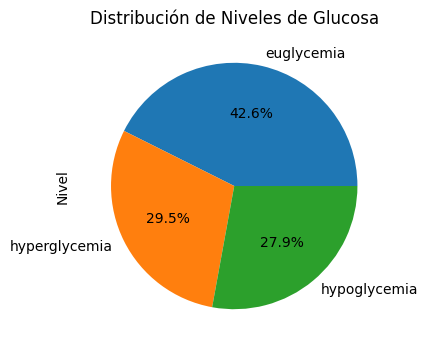

In [102]:
df_Yval_scaled = pd.DataFrame(array_Yval_scaled, columns=['Glucose level']) 
df_Yval_scaled['Nivel'] = df_Yval_scaled['Glucose level'].apply(utils.label_LevelBG)  
array_YVal_label=df_Yval_scaled['Nivel'].to_numpy()
df_Yval_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [103]:
df_Yval_scaled['Nivel'].value_counts()

euglycemia       26
hyperglycemia    18
hypoglycemia     17
Name: Nivel, dtype: int64

In [104]:
minClass=df_Y_scaled['Nivel'].value_counts().min()
minClass

17

In [105]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(array_Xval,array_Yval,array_YVal_label,0,'hyperglycemia',False,minClass) 

In [106]:
len(YnewLabel)

60

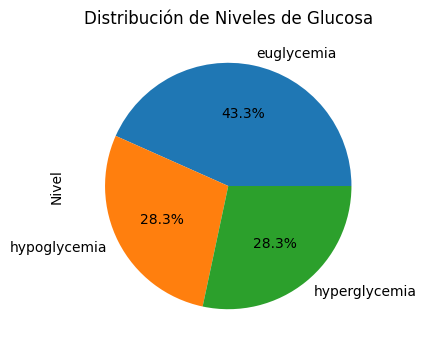

In [107]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [108]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       26
hypoglycemia     17
hyperglycemia    17
Name: Nivel, dtype: int64

In [109]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(XNew,YNew,YnewLabel,0,'euglycemia',False,minClass) 

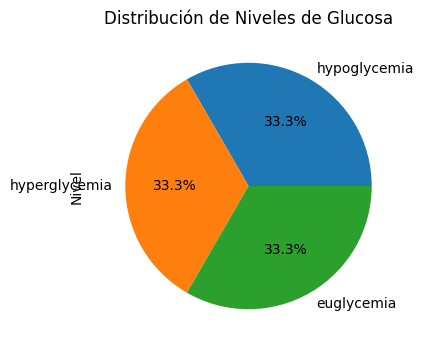

In [110]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [111]:
df_Y_scaled['Nivel'].value_counts()

hypoglycemia     17
hyperglycemia    17
euglycemia       17
Name: Nivel, dtype: int64

<AxesSubplot: >

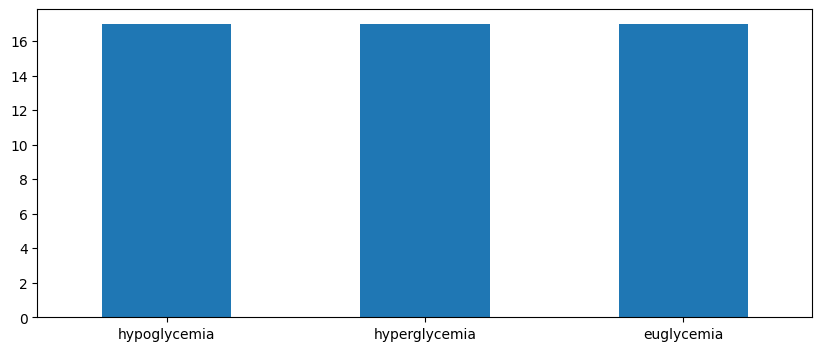

In [112]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [113]:
with open('dataset/generado/'+paciente+'/array_Xval_down_equals.npy', 'wb') as f:
    np.save(f, XNew)

In [114]:
with open('dataset/generado/'+paciente+'/array_Yval_down_equals.npy', 'wb') as f:
    np.save(f, YNew)